# FINAL PROJECTS 1

## 1. Introduction

Anggota Kelompok 2:
<ol>
    <li>Mohammad Arkan</li>
    <li>Jonathan Calvin Limawal</li>
    <li>Desi Suci Nopianti</li>
</ol>

# Project Overview

Dataset yang digunakan untuk tugas ini yaitu dataset publik dari keaggle yaitu Uber and Lyft Dataset Boston, MA. Dataset ini berisi informasi mengenai record transaksi perjalanan menggunakan taksi jenis uber dan lyft. Tujuan utama dari penelitian ini adalah untuk memprediksi harga perjalanan yang paling sesuai dengan mengimplementasikan analisa prediction menggunakan algoritma Linear Regression. Sebelum melakukan proses modeling menggunakan algoritma yang telah disebutkan sebelumnya, harus dilakukan pemilihan fitur yang tepat. Dataset ini memiliki dimensi yang tinggi dan atribut-atribut yang berkorelasi. Dataset ini memiliki 57 atribut, tetapi yang paling relevan ada 5 atribut dari semuanya.

#### Final Project 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:
<ol>
    <li>Mampu memahami konsep regression dengan Linear Regression.</li>
    <li>Mampu mempersiapkan data untuk digunakan dalam model Linear Regression.</li>
    <li>Mampu mengimplementasikan Linear Regression untuk membuat prediksi.</li>
</ol>

# Instruksi Project

<ol>
    <li>Perkenalan</li>
    <li>Import Libraries</li>
    <li>Data Loading</li>
    <li>Data cleaning</li>
    <li>Explorasi Data</li>
    <li>Data Preprocessing</li>
    <li>Pendefinisian Model</li>
    <li>Pelatihan Model</li>
    <li>Evaluasi Model</li>
    <li>Model Inference</li>
    <li>Pengambilan Keputusan</li>
</ol>

# Attribute Information

<ol>
    <li>id</li>
    <li>timestamp</li>
    <li>hour</li>
    <li>day</li>
    <li>month</li>
    <li>datetime</li>
    <li>source: destinasi awal</li>
    <li>destination: destinasi akhir</li>
    <li>cab_type: tipe transportasi (uber / lyft)</li>
    <li>… dan lainnya</li>
</ol>

## 2. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 3. Data Loading

In [2]:
# Mengantisipasi untuk unstandard missing values
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN', ' ', ' - ']

# Membaca dataset
rideShare_df = pd.read_csv('rideshare_kaggle.csv', na_values=missing_values)

# menampilkan tampilan kolom full
pd.set_option('display.max_columns', 500)

# Menampilkan Datasett
rideShare_df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
# Menghitung jumlah baris dan kolom
rows, columns = rideShare_df.shape
print('Dataset ini terdapat: ')
# Menampilkan jumlah baris
print(rows, "Rows")
# Menampilkan jumlah kolom
print(columns, "Columns")

Dataset ini terdapat: 
693071 Rows
57 Columns


In [4]:
# Melihat statistik deskriptif dari data
rideShare_df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [5]:
# Melihat informasi tentang dataset
rideShare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

## 4. Data Cleaning

In [6]:
# mengecek apakah disetiap attribute terdapat missing value dengan tampilan boolean (true/false)
rideShare_df.isnull().any()

id                             False
timestamp                      False
hour                           False
day                            False
month                          False
datetime                       False
timezone                       False
source                         False
destination                    False
cab_type                       False
product_id                     False
name                           False
price                           True
distance                       False
surge_multiplier               False
latitude                       False
longitude                      False
temperature                    False
apparentTemperature            False
short_summary                  False
long_summary                   False
precipIntensity                False
precipProbability              False
humidity                       False
windSpeed                      False
windGust                       False
windGustTime                   False
v

In [7]:
# menampilkan jumlah missing value pada dataset
rideShare_df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Terdapat missing values pada kolom price pada dataset

In [8]:
rideShare_df.shape

(693071, 57)

In [9]:
# menghapus missing value pada kolom price
rideShare_df.dropna(inplace=True)


In [10]:
rideShare_df.shape

(637976, 57)

In [11]:
# menampilkan jumlah missing value pada dataset
rideShare_df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Sudah tidak terdapat missing values pada kolom price dalam dataset

In [12]:
# melihat apakah terdapat duplikat pada dataset
rideShare_df.duplicated().sum()

0

In [13]:
# melihat informasi dari dataset
rideShare_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

## 5. Data Exploration

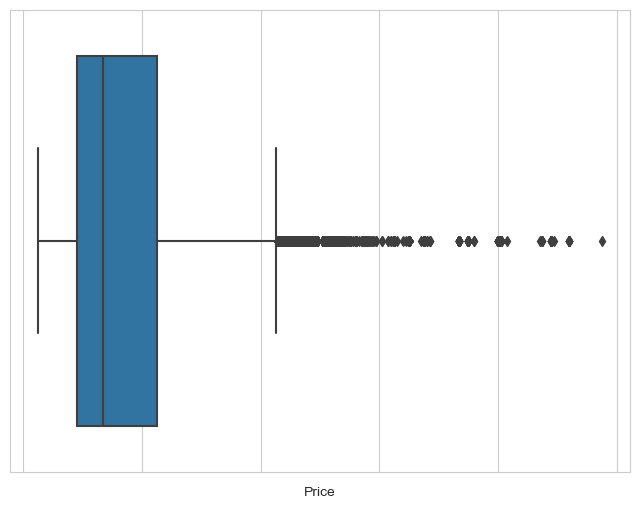

In [14]:
# melihat apakah terdapat outlier pada kolom price
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
boxplot = sns.boxplot(data=rideShare_df, x='price')
plt.xlabel('Price')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [15]:
# Print shape lama dari dataset yang belum di handling outliernya
print("Bentuk Shape Lama: ", rideShare_df.shape)

# Kalkulasi batas atas dan bawah
Q1 = rideShare_df['price'].quantile(0.25)
Q3 = rideShare_df['price'].quantile(0.75)

IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Menghapus outlier
rideShare_df = rideShare_df[(rideShare_df['price'] >= lower) & (rideShare_df['price'] <= upper)]

# Print shape baru dari dataset yang sudah di handling outliernya
print("Bentuk Shape Baru: ", rideShare_df.shape)

Bentuk Shape Lama:  (637976, 57)
Bentuk Shape Baru:  (632387, 57)


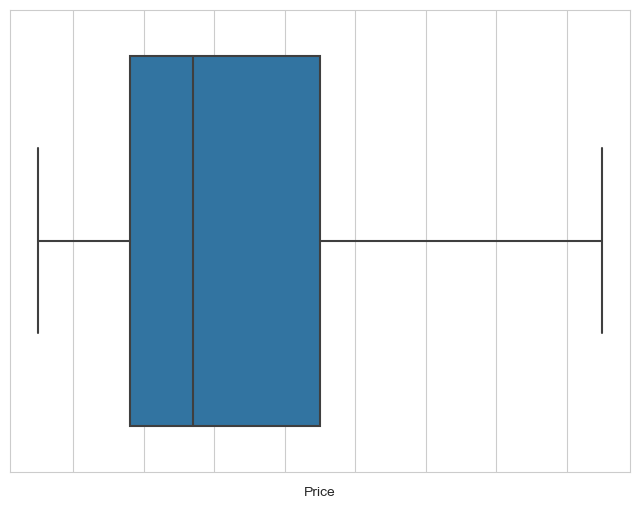

In [16]:
# melihat apakah terdapat outlier pada kolom price
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
boxplot = sns.boxplot(data=rideShare_df, x='price')
plt.xlabel('Price')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

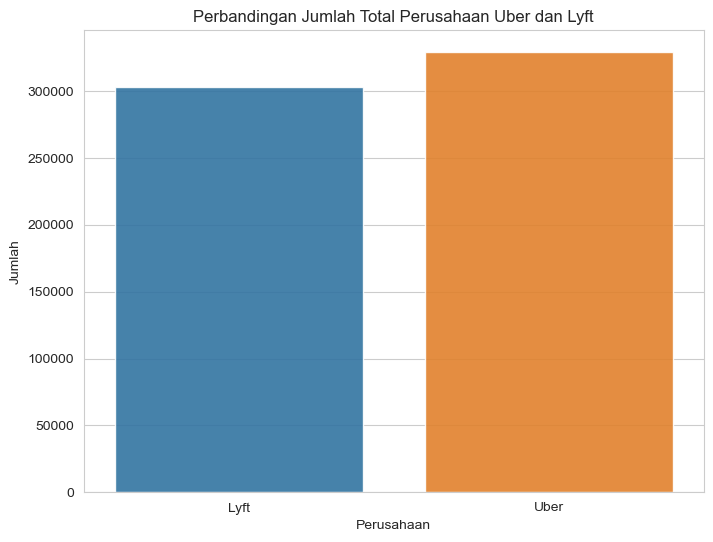

In [17]:
# memfilter dataset untuk Uber dan Lyft
rideShare_df_cab = rideShare_df.loc[(rideShare_df['cab_type'] == 'Uber') | (rideShare_df['cab_type'] == 'Lyft')]

# menghitung jumlah total perusahaan Uber dan Lyft
counts = rideShare_df_cab.groupby('cab_type')['distance'].count()

# menampilkan grafik bar
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts.values, alpha=0.9)
plt.title('Perbandingan Jumlah Total Perusahaan Uber dan Lyft')
plt.ylabel('Jumlah')
plt.xlabel('Perusahaan')
plt.show()

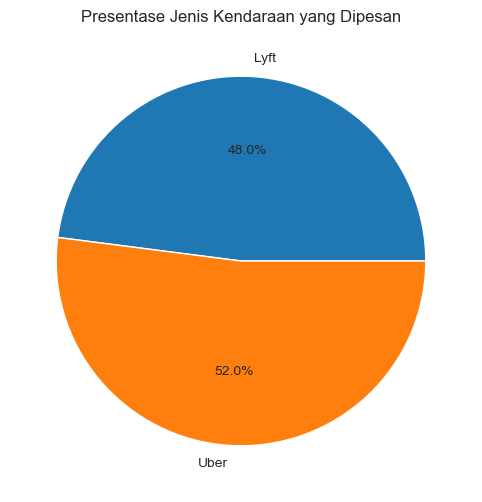

In [18]:
# menghitung jumlah total kendaraan yang dipesan untuk setiap jenis kendaraan
counts = rideShare_df.groupby('cab_type')['distance'].count()

# menghitung presentase dari setiap jenis kendaraan
percentages = counts / counts.sum() * 100

# menampilkan grafik pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.pie(percentages.values, labels=percentages.index, autopct='%1.1f%%')
plt.title('Presentase Jenis Kendaraan yang Dipesan')
plt.show()

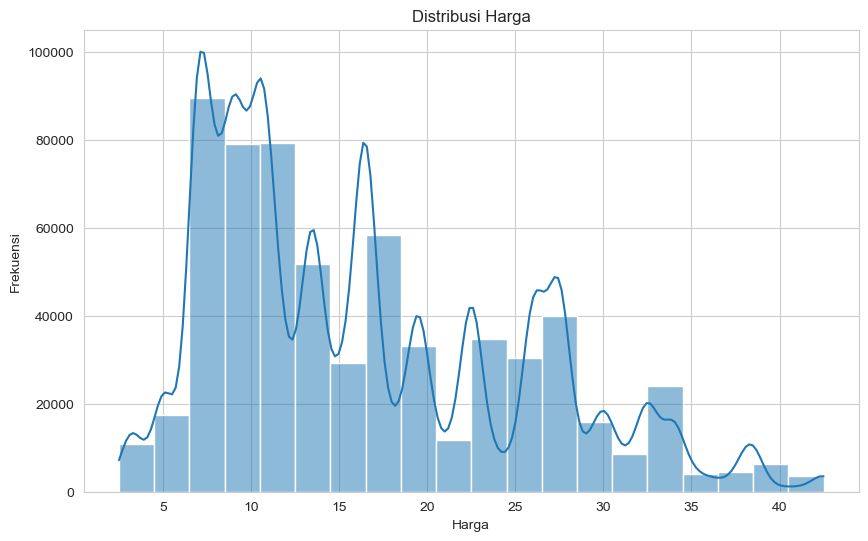

In [19]:
# Mengatur ukuran gambar untuk plot
plt.figure(figsize=(10, 6))

# Membuat histogram distribusi harga menggunakan seaborn
sns.histplot(data=rideShare_df, x='price', bins=20, kde=True)

# Menambahkan judul plot
plt.title('Distribusi Harga')

# Menambahkan label sumbu x
plt.xlabel('Harga')

# Menambahkan label sumbu y
plt.ylabel('Frekuensi')

# Menampilkan plot histogram
plt.show()

In [20]:
# melihat informasi dari dataset
rideShare_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632387 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           632387 non-null  object 
 1   timestamp                    632387 non-null  float64
 2   hour                         632387 non-null  int64  
 3   day                          632387 non-null  int64  
 4   month                        632387 non-null  int64  
 5   datetime                     632387 non-null  object 
 6   timezone                     632387 non-null  object 
 7   source                       632387 non-null  object 
 8   destination                  632387 non-null  object 
 9   cab_type                     632387 non-null  object 
 10  product_id                   632387 non-null  object 
 11  name                         632387 non-null  object 
 12  price                        632387 non-null  float64
 13 

## 6. Data Preprocessing

### 6.1 Dropping Unrelated/Unused/Unnecessary Columns

In [21]:
columns_to_drop1 = ['timezone', 'product_id', 'id', 'timestamp', 'latitude', 'longitude', 'long_summary', 'datetime']
rideShare_df = rideShare_df.drop(columns=columns_to_drop1)

In [22]:
rideShare_df.shape

(632387, 49)

In [23]:
rideShare_df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,37.12,Mostly Cloudy,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,37.35,Rain,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,32.93,Clear,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,29.63,Clear,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,30.88,Partly Cloudy,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### 6.2 Feature Selection/Reduction (for temperature related columns)

In [24]:
temperature_column = ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                      'apparentTemperatureLow', 'temperatureMin','temperatureHighTime','temperatureMax', 'temperatureLowTime',
                      'apparentTemperatureHighTime', 'apparentTemperatureLowTime','apparentTemperatureMin','apparentTemperatureMax',
                      'temperatureMinTime', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime', 
                      'apparentTemperatureMaxTime', 'price']

In [25]:
temp_df = rideShare_df[temperature_column]
temp_df.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,temperatureLowTime,apparentTemperatureHighTime,apparentTemperatureLowTime,apparentTemperatureMin,apparentTemperatureMax,temperatureMinTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,1545048000,1544968800,1545044400,33.73,38.07,1545012000,1545012000,1544968800,1545012000,1544958000,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,1543298400,1543251600,1543291200,36.20,43.92,1543233600,1543233600,1543251600,1543291200,1543251600,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,1543402800,1543320000,1543392000,31.04,44.12,1543377600,1543377600,1543320000,1543377600,1543320000,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,1543579200,1543510800,1543575600,30.30,38.53,1543550400,1543550400,1543510800,1543550400,1543510800,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,1543478400,1543420800,1543460400,29.11,35.75,1543402800,1543402800,1543420800,1543392000,1543420800,9.0


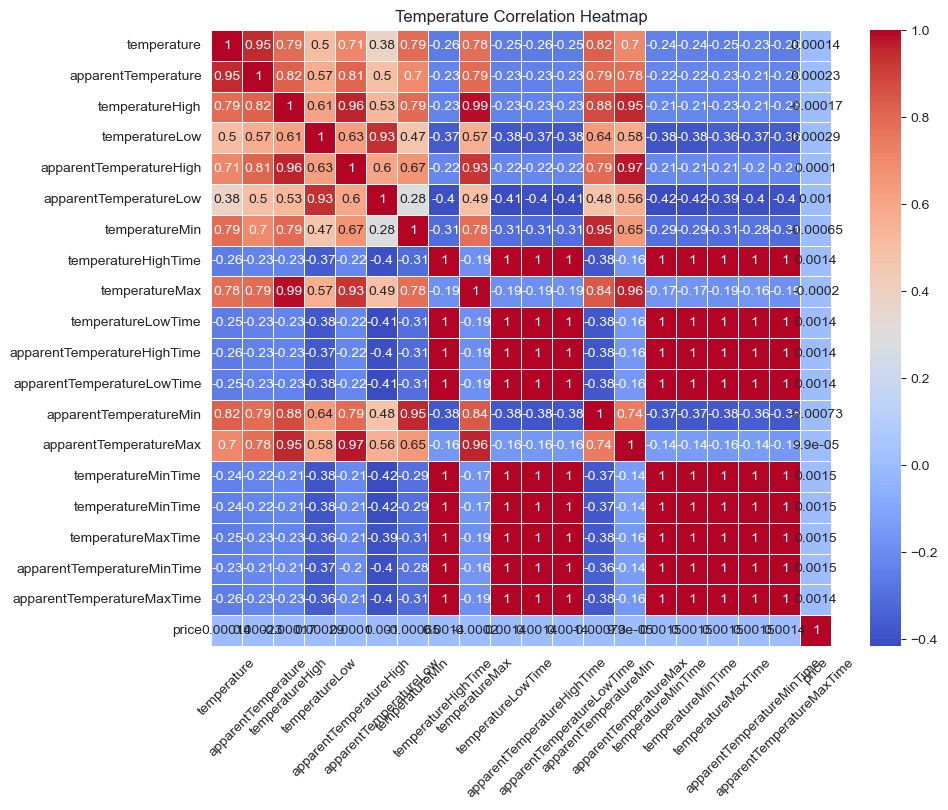

In [26]:
correlation_matrix = temp_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Temperature Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

In [27]:
temperature_column = [col for col in temperature_column if col != 'price']
rideShare_df = rideShare_df.drop(columns=temperature_column, axis=1)
rideShare_df.shape

(632387, 31)

In [28]:
rideShare_df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800


### 6.3 Feature Selection/Reduction (for climate related columns)

In [29]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGustTime', 'sunriseTime',
                  'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing', 'sunsetTime', 'uvIndexTime',
                  'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'visibility.1',
                  'precipIntensityMax','price']

In [30]:
temp_df = rideShare_df[climate_column]
temp_df.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGustTime,sunriseTime,windGust,visibility,dewPoint,pressure,windBearing,sunsetTime,uvIndexTime,cloudCover,uvIndex,ozone,moonPhase,visibility.1,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,1545015600,1544962084,9.17,10.000,32.70,1021.98,57,1544994864,1544979600,0.72,0,303.8,0.30,10.000,0.1276,5.0
1,0.1299,1.0,0.94,11.98,1543291200,1543232969,11.98,4.786,41.83,1003.97,90,1543266992,1543251600,1.00,0,291.1,0.64,4.786,0.1300,11.0
2,0.0000,0.0,0.75,7.33,1543334400,1543319437,7.33,10.000,31.10,992.28,240,1543353364,1543338000,0.03,0,315.7,0.68,10.000,0.1064,7.0
3,0.0000,0.0,0.73,5.28,1543514400,1543492370,5.28,10.000,26.64,1013.73,310,1543526114,1543507200,0.00,0,291.1,0.75,10.000,0.0000,26.0
4,0.0000,0.0,0.70,9.14,1543446000,1543405904,9.14,10.000,28.61,998.36,303,1543439738,1543420800,0.44,0,347.7,0.72,10.000,0.0001,9.0


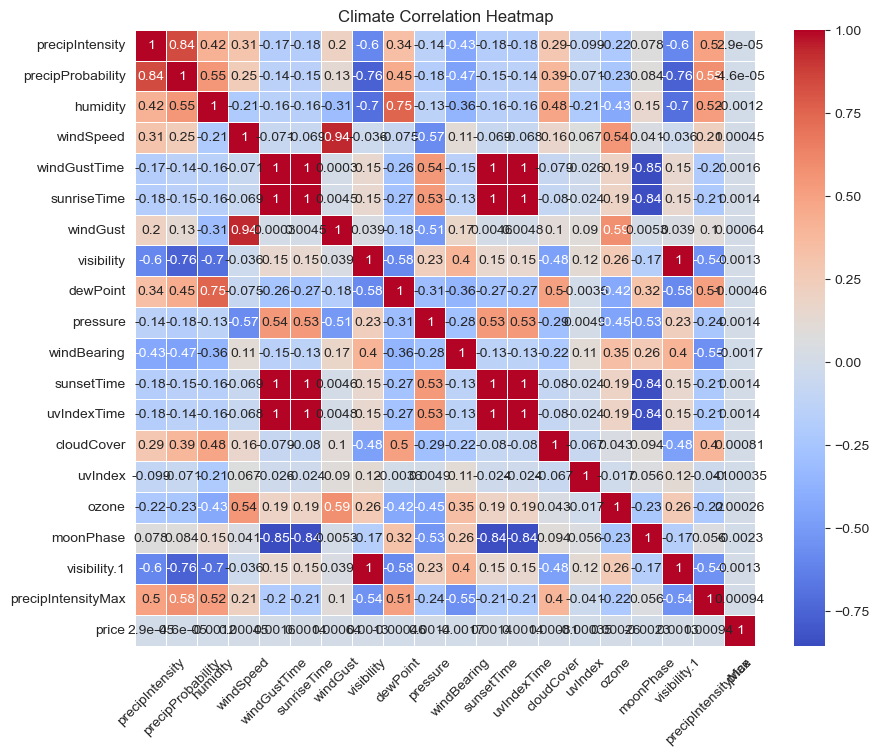

In [31]:
correlation_matrix = temp_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Climate Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

In [32]:
climate_column = [col for col in climate_column if col != 'price']
rideShare_df = rideShare_df.drop(columns=climate_column, axis=1)
rideShare_df.shape

(632387, 12)

### 6.4 Feature Selection/Reduction (for time related columns)

In [33]:
time_column = ['hour', 'day', 'month', 'price']

In [34]:
temp_df = rideShare_df[time_column]
temp_df.head()

,hour,day,month,price
0,9,16,12,5.0
1,2,27,11,11.0
2,1,28,11,7.0
3,4,30,11,26.0
4,3,29,11,9.0


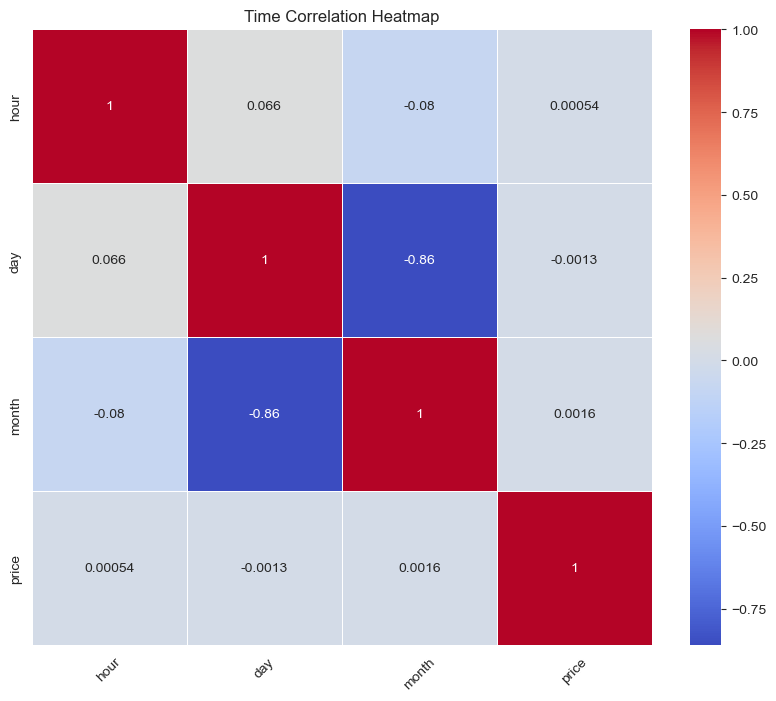

In [35]:
correlation_matrix = temp_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Time Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

In [36]:
time_column = [col for col in time_column if col != 'price']
rideShare_df = rideShare_df.drop(columns=time_column, axis=1)
rideShare_df.shape

(632387, 9)

In [37]:
rideShare_df.head()

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


### 6.5 Feature Selection/Reduction (for categorical columns)

In [38]:
cat_column = ['source', 'destination', 'name','cab_type', 'icon', 'short_summary', 'price']

In [39]:
temp_df = rideShare_df[cat_column]
temp_df.head()

,source,destination,name,cab_type,icon,short_summary,price
0,Haymarket Square,North Station,Shared,Lyft,partly-cloudy-night,Mostly Cloudy,5.0
1,Haymarket Square,North Station,Lux,Lyft,rain,Rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,clear-night,Clear,7.0
3,Haymarket Square,North Station,Lux Black XL,Lyft,clear-night,Clear,26.0
4,Haymarket Square,North Station,Lyft XL,Lyft,partly-cloudy-night,Partly Cloudy,9.0


In [40]:
label_encoder = LabelEncoder()

for col in cat_column:
    temp_df[col] = label_encoder.fit_transform(temp_df[col])

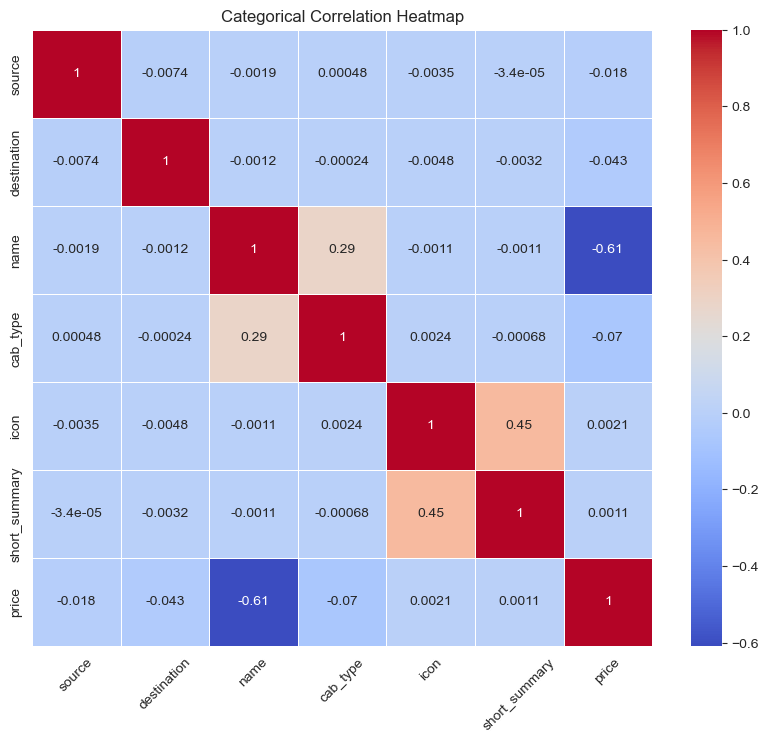

In [41]:
correlation_matrix = temp_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Categorical Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

### 6.6 Final Columns

In [42]:
cat_column = [col for col in cat_column if col not in ['price', 'cab_type', 'name']]
rideShare_df = rideShare_df.drop(columns=cat_column)
rideShare_df.shape

(632387, 5)

In [43]:
rideShare_df.head()

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0


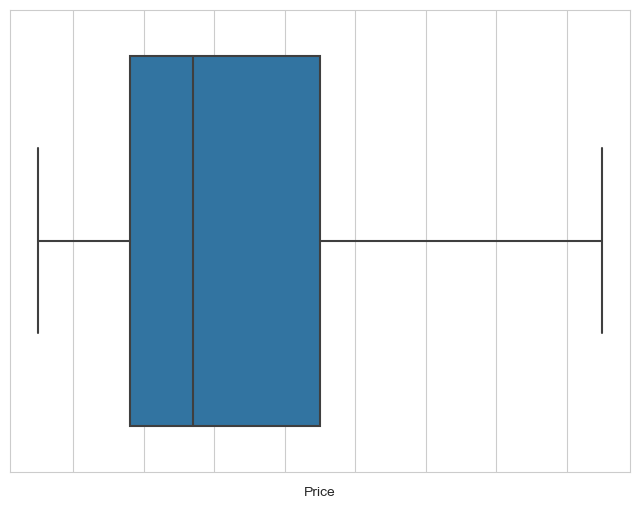

In [44]:
# melihat apakah terdapat outlier pada kolom price
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
boxplot = sns.boxplot(data=rideShare_df, x='price')
plt.xlabel('Price')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

### 6.7 One-Hot Encoding

In [45]:
rideShare_df = pd.get_dummies(rideShare_df, columns=['cab_type', 'name'], prefix=['cab_type', 'name'])
rideShare_df.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


## 7. Data Splitting

In [46]:
X = rideShare_df.drop('price', axis=1) 
y = rideShare_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train['distance'].unique()

array([1.71, 2.  , 1.69, 1.04, 1.84, 0.63, 3.47, 3.05, 5.33, 2.62, 1.41,
       0.55, 2.61, 2.47, 3.22, 1.95, 1.82, 2.84, 4.54, 1.8 , 1.56, 2.99,
       1.16, 0.39, 2.73, 1.  , 4.56, 3.01, 1.44, 2.38, 3.04, 0.62, 0.56,
       4.7 , 1.57, 0.72, 2.11, 1.08, 4.38, 1.22, 2.42, 4.48, 0.57, 1.55,
       1.72, 0.54, 1.11, 3.26, 2.2 , 1.35, 2.8 , 4.72, 2.5 , 1.91, 1.03,
       0.52, 2.86, 1.32, 0.43, 2.98, 1.38, 2.74, 3.32, 2.88, 2.04, 0.58,
       1.61, 2.4 , 1.28, 2.27, 2.82, 1.3 , 2.29, 2.83, 3.1 , 1.74, 1.51,
       4.4 , 1.09, 1.93, 0.71, 2.72, 2.53, 1.43, 3.07, 0.91, 4.22, 1.34,
       3.45, 1.02, 3.61, 1.73, 1.45, 1.53, 2.31, 3.02, 1.39, 3.46, 3.2 ,
       0.7 , 2.07, 3.37, 2.58, 1.49, 3.08, 3.39, 3.18, 1.25, 1.65, 2.36,
       2.44, 1.66, 2.43, 2.94, 1.14, 2.46, 2.32, 3.13, 2.12, 3.16, 4.58,
       0.49, 7.24, 1.4 , 4.12, 0.53, 1.07, 1.5 , 0.61, 4.42, 2.87, 1.17,
       3.34, 3.06, 0.82, 3.14, 3.31, 5.56, 0.9 , 2.17, 1.77, 1.21, 1.87,
       2.41, 4.55, 2.49, 2.15, 7.34, 3.23, 1.89, 1.

## 8. Feature Scaling

In [48]:
scaler = MinMaxScaler()

X_train[['distance', 'surge_multiplier']] = scaler.fit_transform(X_train[['distance', 'surge_multiplier']])
X_test[['distance', 'surge_multiplier']] = scaler.transform(X_test[['distance', 'surge_multiplier']])

## 9. Model Development and Training

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 10. Model Testing and Evaluation

In [50]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Nilai MSE dari model Regresi Linear sebesar: {:.3f}".format(mse))
print("Nilai R-squared dari model Regresi Linear sebesar: {:.3f}".format(r2))

Nilai MSE dari model Regresi Linear sebesar: 5.117
Nilai R-squared dari model Regresi Linear sebesar: 0.933
